In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_location="C:\\Users\\Work Only\\Downloads\\Visadataset.csv"
visa=pd.read_csv(file_location)
visa

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [5]:
visa.drop('case_id',axis=1,inplace=True)
visa

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [6]:
visa.select_dtypes(include='object').nunique()

continent                6
education_of_employee    4
has_job_experience       2
requires_job_training    2
region_of_employment     5
unit_of_wage             4
full_time_position       2
case_status              2
dtype: int64

# EDA

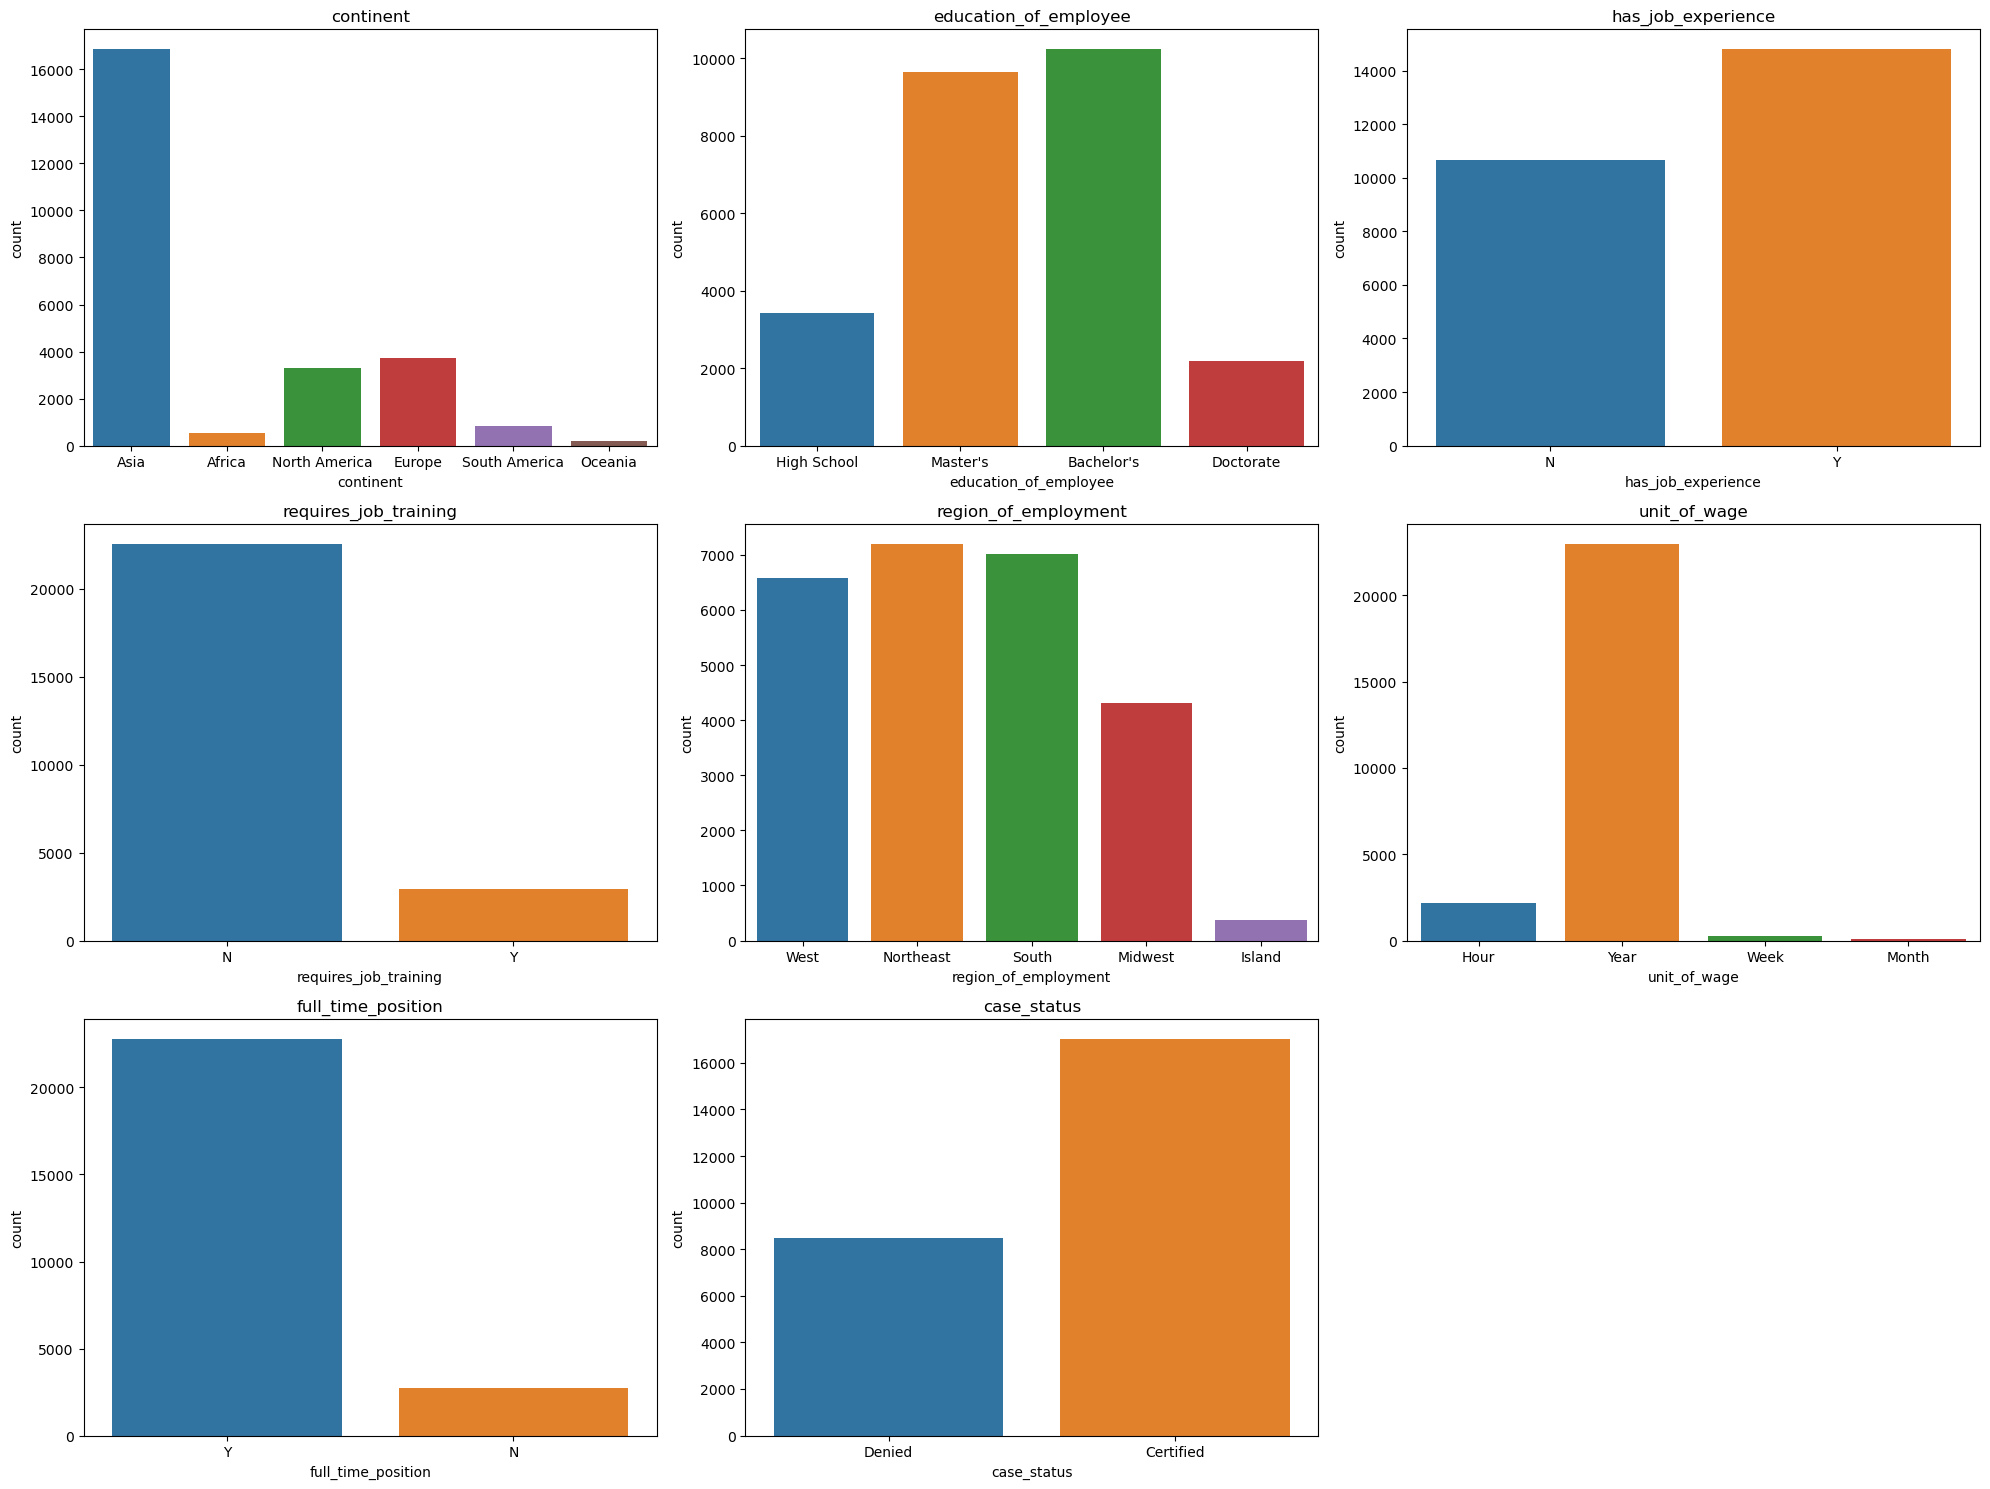

In [10]:
cat_columns=visa.select_dtypes(include='object').columns.to_list()

num_columns=len(cat_columns)
num_rows=(num_columns + 2)//3
fig,ax=plt.subplots(ncols=3,nrows=num_rows,figsize=(20,5*num_rows))
ax=ax.flatten()

for i,column in enumerate(cat_columns):
    top=visa[column].value_counts().nlargest(6).index
    filtered_visa=visa[visa[column].isin(top)]
    sns.countplot(data=filtered_visa,x=column,ax=ax[i])
    ax[i].set_title(column)
    
if num_columns<len(ax):
    for i in range(num_columns,len(ax)):
        fig.delaxes(ax[i])
        
fig.tight_layout()

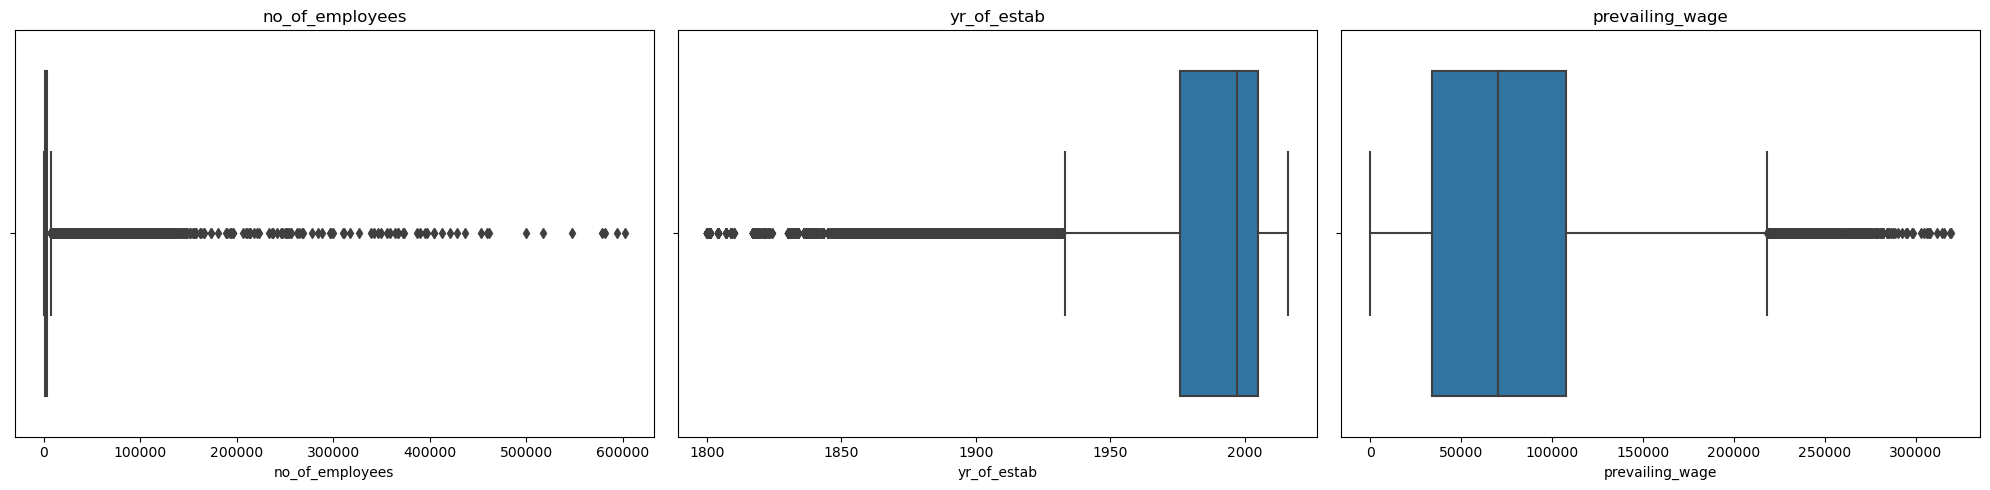

In [12]:
num_columns=visa.select_dtypes(include=['int','float']).columns.to_list()

num_cols=len(num_columns)
num_rows=(num_cols + 2)//3
fig,ax=plt.subplots(ncols=3,nrows=num_rows,figsize=(20,5*num_rows))
ax=ax.flatten()

for i,columns in enumerate(num_columns):
    sns.boxplot(data=visa,x=columns,ax=ax[i])
    ax[i].set_title(columns)
    
if num_cols < len(ax):
    for i in range(num_cols,len(ax)):
        fig.delaxes(ax[i])
        
fig.tight_layout()

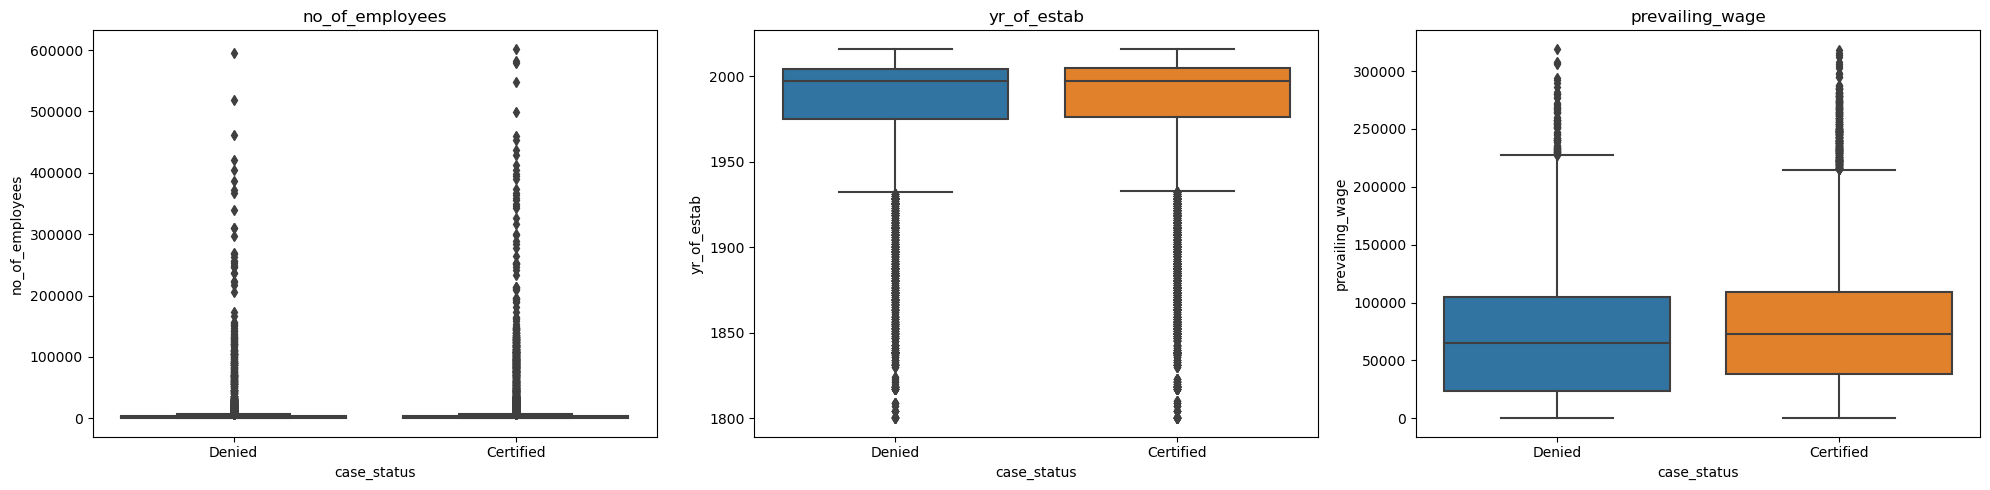

In [14]:
num_columns=visa.select_dtypes(include=['int','float']).columns.to_list()

num_col=len(num_columns)
num_rows=(num_col + 2)//3
fig,ax=plt.subplots(ncols=3,nrows=num_rows,figsize=(20,5*num_rows))
ax=ax.flatten()

for i,column in enumerate(num_columns):
    sns.boxplot(data=visa,x='case_status',y=column,ax=ax[i])
    ax[i].set_title(column)
    
if num_col<len(ax):
    for i in range(num_col,len(ax)):
        fig.delaxes(ax[i])
        
fig.tight_layout()

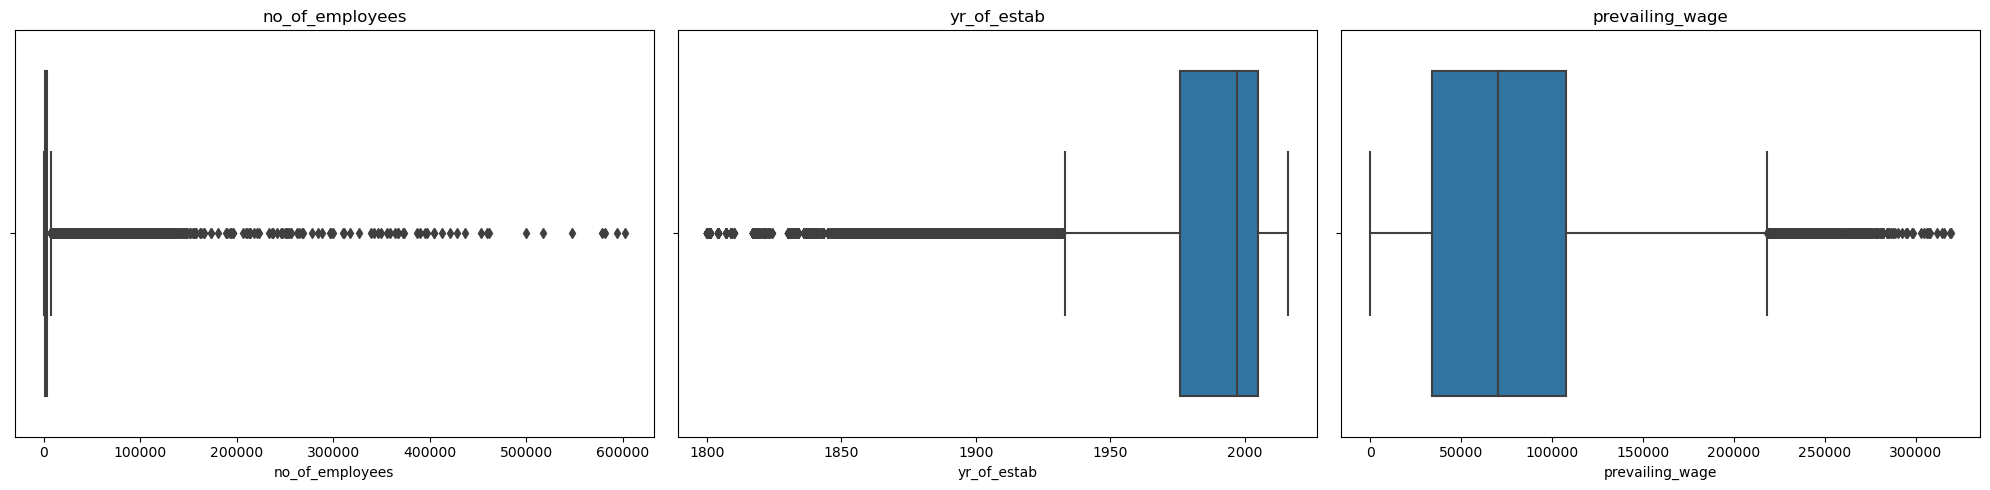

In [20]:
num_columns=visa.select_dtypes(include=['int','float']).columns.to_list()

num_col=len(num_columns)
num_rows=(num_col + 2)//3
fig,ax=plt.subplots(ncols=3,nrows=num_rows,figsize=(20,5*num_rows))
ax=ax.flatten()

for i,column in enumerate(num_columns):
    sns.boxplot(data=visa,x=column,ax=ax[i],hue='case_status')
    ax[i].set_title(column)
    
if num_col<len(ax):
    for i in range(num_col,len(ax)):
        fig.delaxes(ax[i])
        
fig.tight_layout()

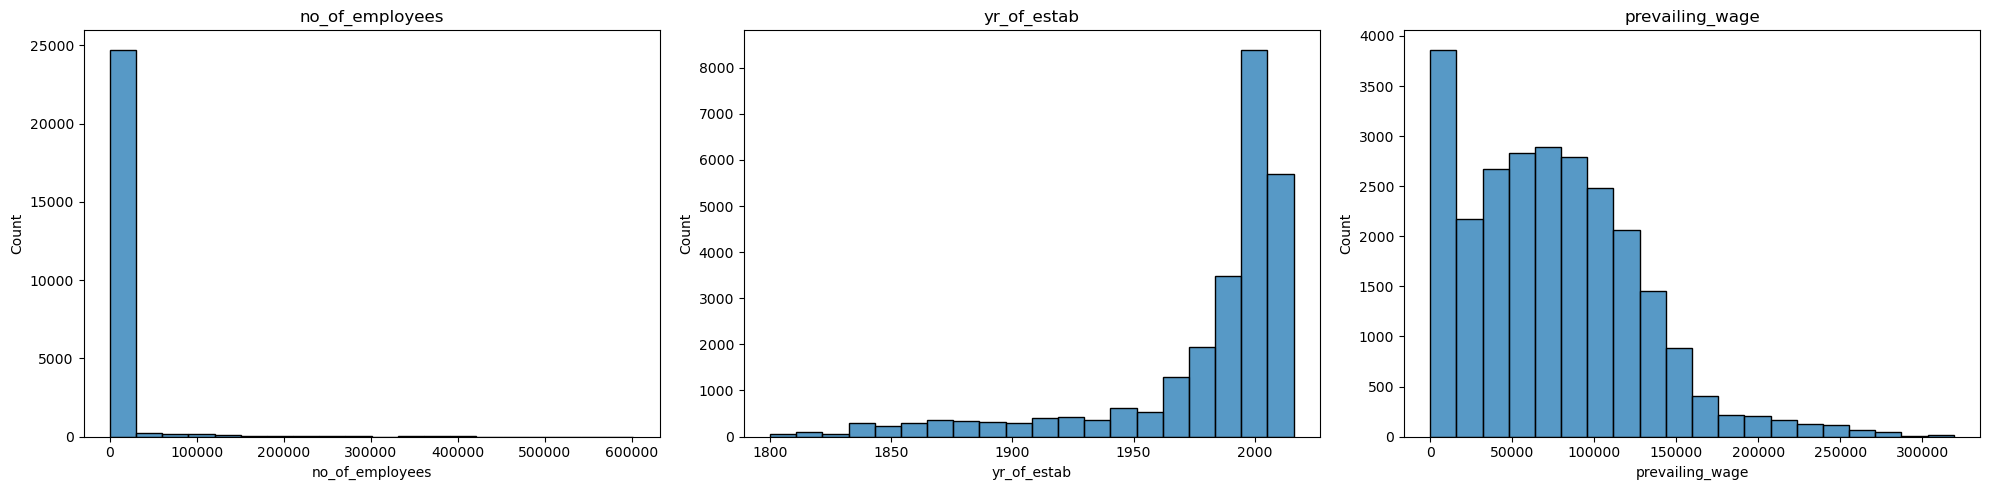

In [15]:
num_columns=visa.select_dtypes(include=['int','float']).columns.to_list()

num_cols=len(num_columns)
num_rows=(num_cols + 2)//3
fig,ax=plt.subplots(ncols=3,nrows=num_rows,figsize=(20,5*num_rows))
ax=ax.flatten()

for i,column in enumerate(num_columns):
    sns.histplot(data=visa,x=column,ax=ax[i],bins=20)
    ax[i].set_title(column)
    
if num_cols < len(ax):
    for i in range(num_cols,len(ax)):
        fig.delaxes(ax[i])
        
fig.tight_layout()

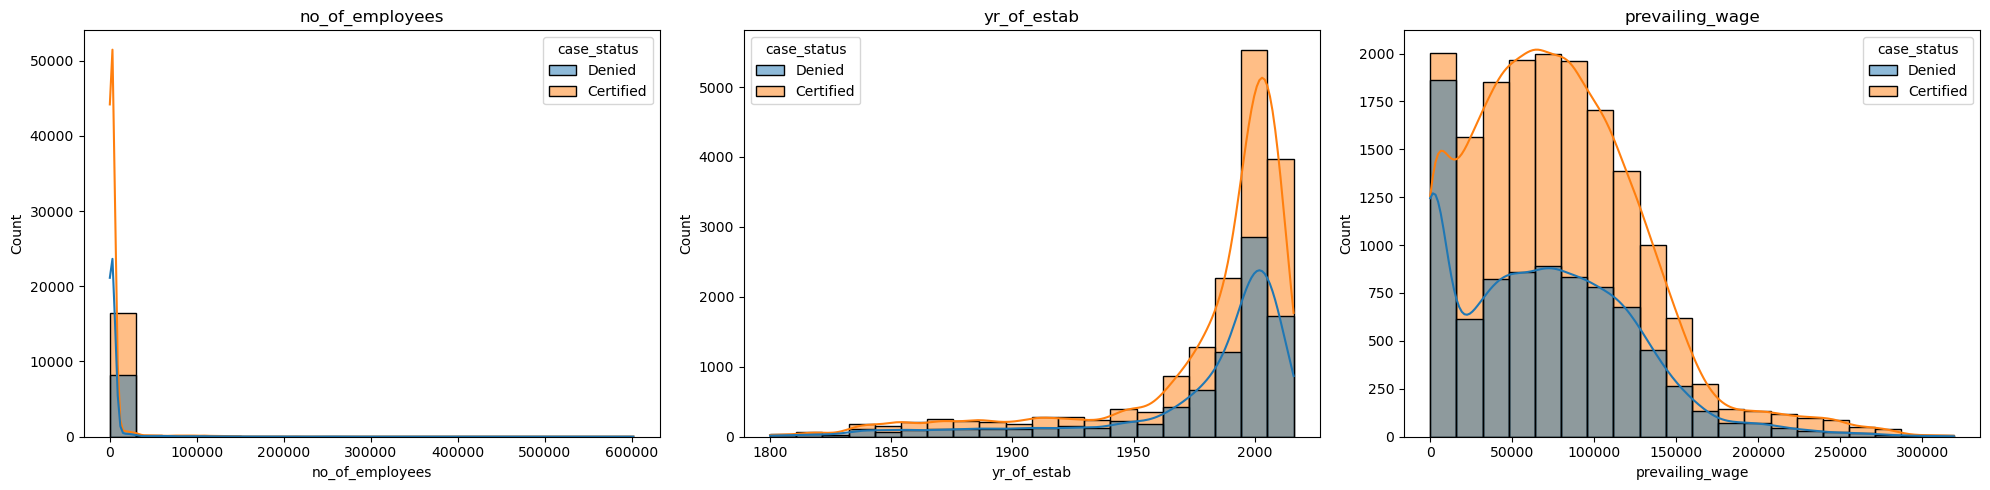

In [19]:
num_columns=visa.select_dtypes(include=['int','float']).columns.to_list()

num_cols=len(num_columns)
num_rows=(num_cols +2)//3
fig,ax=plt.subplots(ncols=3,nrows=num_rows,figsize=(20,5*num_rows))
ax=ax.flatten()

for i,column in enumerate(num_columns):
    sns.histplot(data=visa,x=column,kde=True,hue='case_status',ax=ax[i],bins=20)
    ax[i].set_title(column)
    
if num_cols < len(ax):
    for i in range(num_cols,len(ax)):
        fig.delaxes(ax[i])


fig.tight_layout()

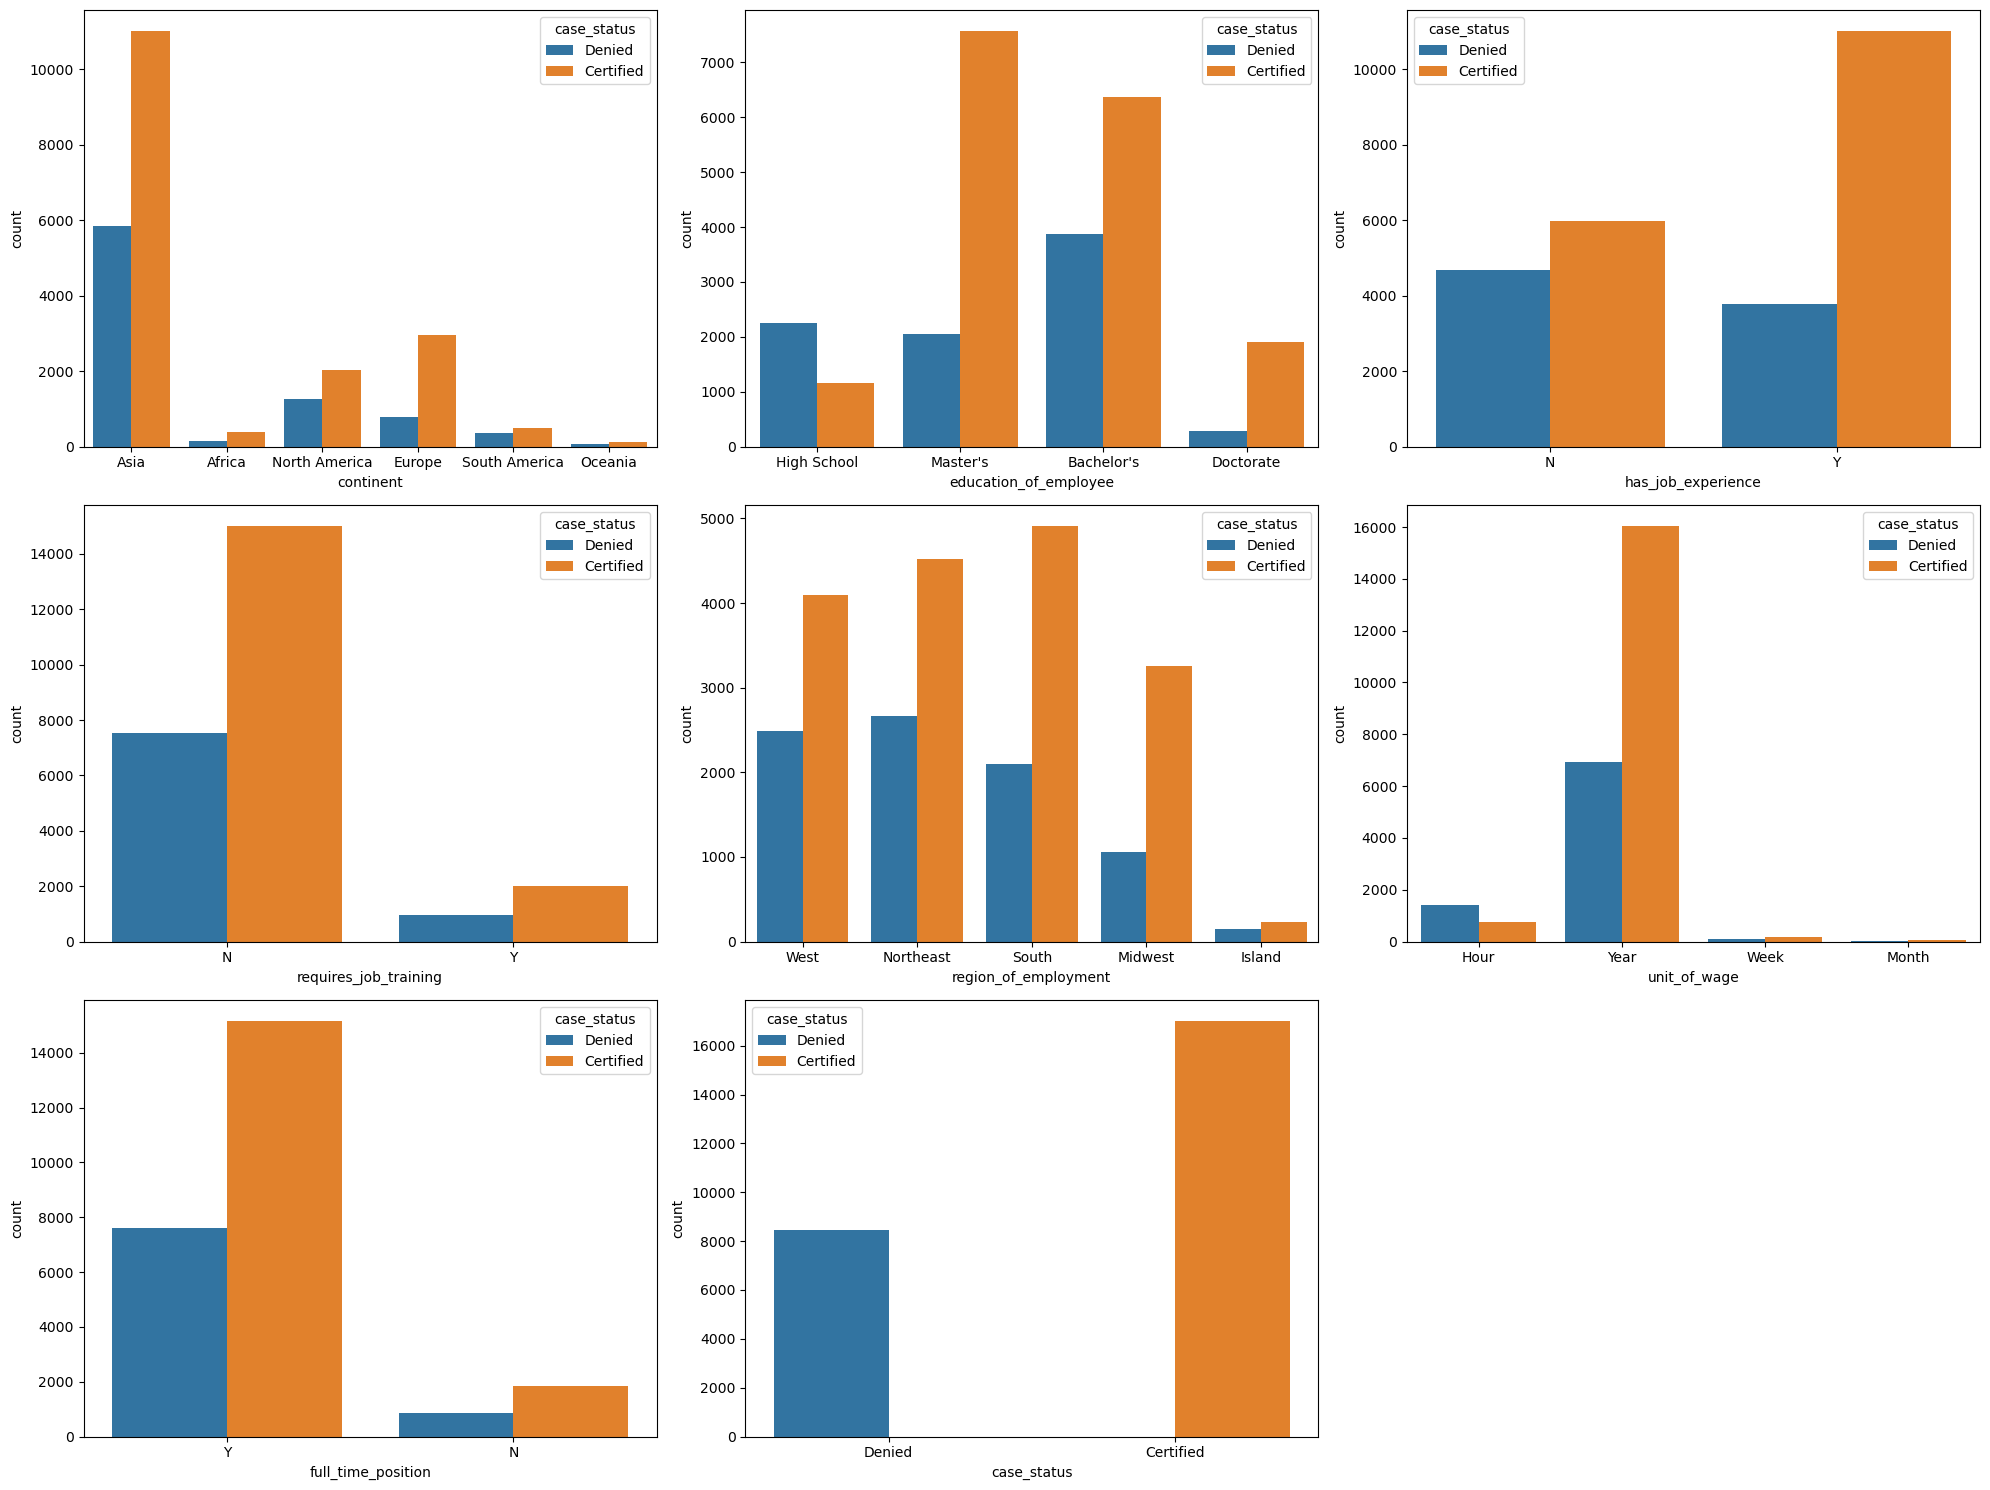

In [21]:
cat_columns=visa.select_dtypes(include='object').columns.to_list()

num_cols=len(cat_columns)
num_rows=(num_cols +2)//3
fig,ax=plt.subplots(ncols=3,nrows=num_rows,figsize=(20,5*num_rows))
ax=ax.flatten()

for i,column in enumerate(cat_columns):
    top=visa[column].value_counts().nlargest(6).index
    filtered_visa=visa[visa[column].isin(top)]
    sns.countplot(data=filtered_visa,x=column,hue='case_status',ax=ax[i])
    
if num_cols<len(ax):
    for i in range(num_cols,len(ax)):
        fig.delaxes(ax[i])
        
fig.tight_layout()

C:\Users\Work Only\AppData\Local\Temp\ipykernel_11784\2139139888.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_count=cat_count_top.append(cat_count_others)


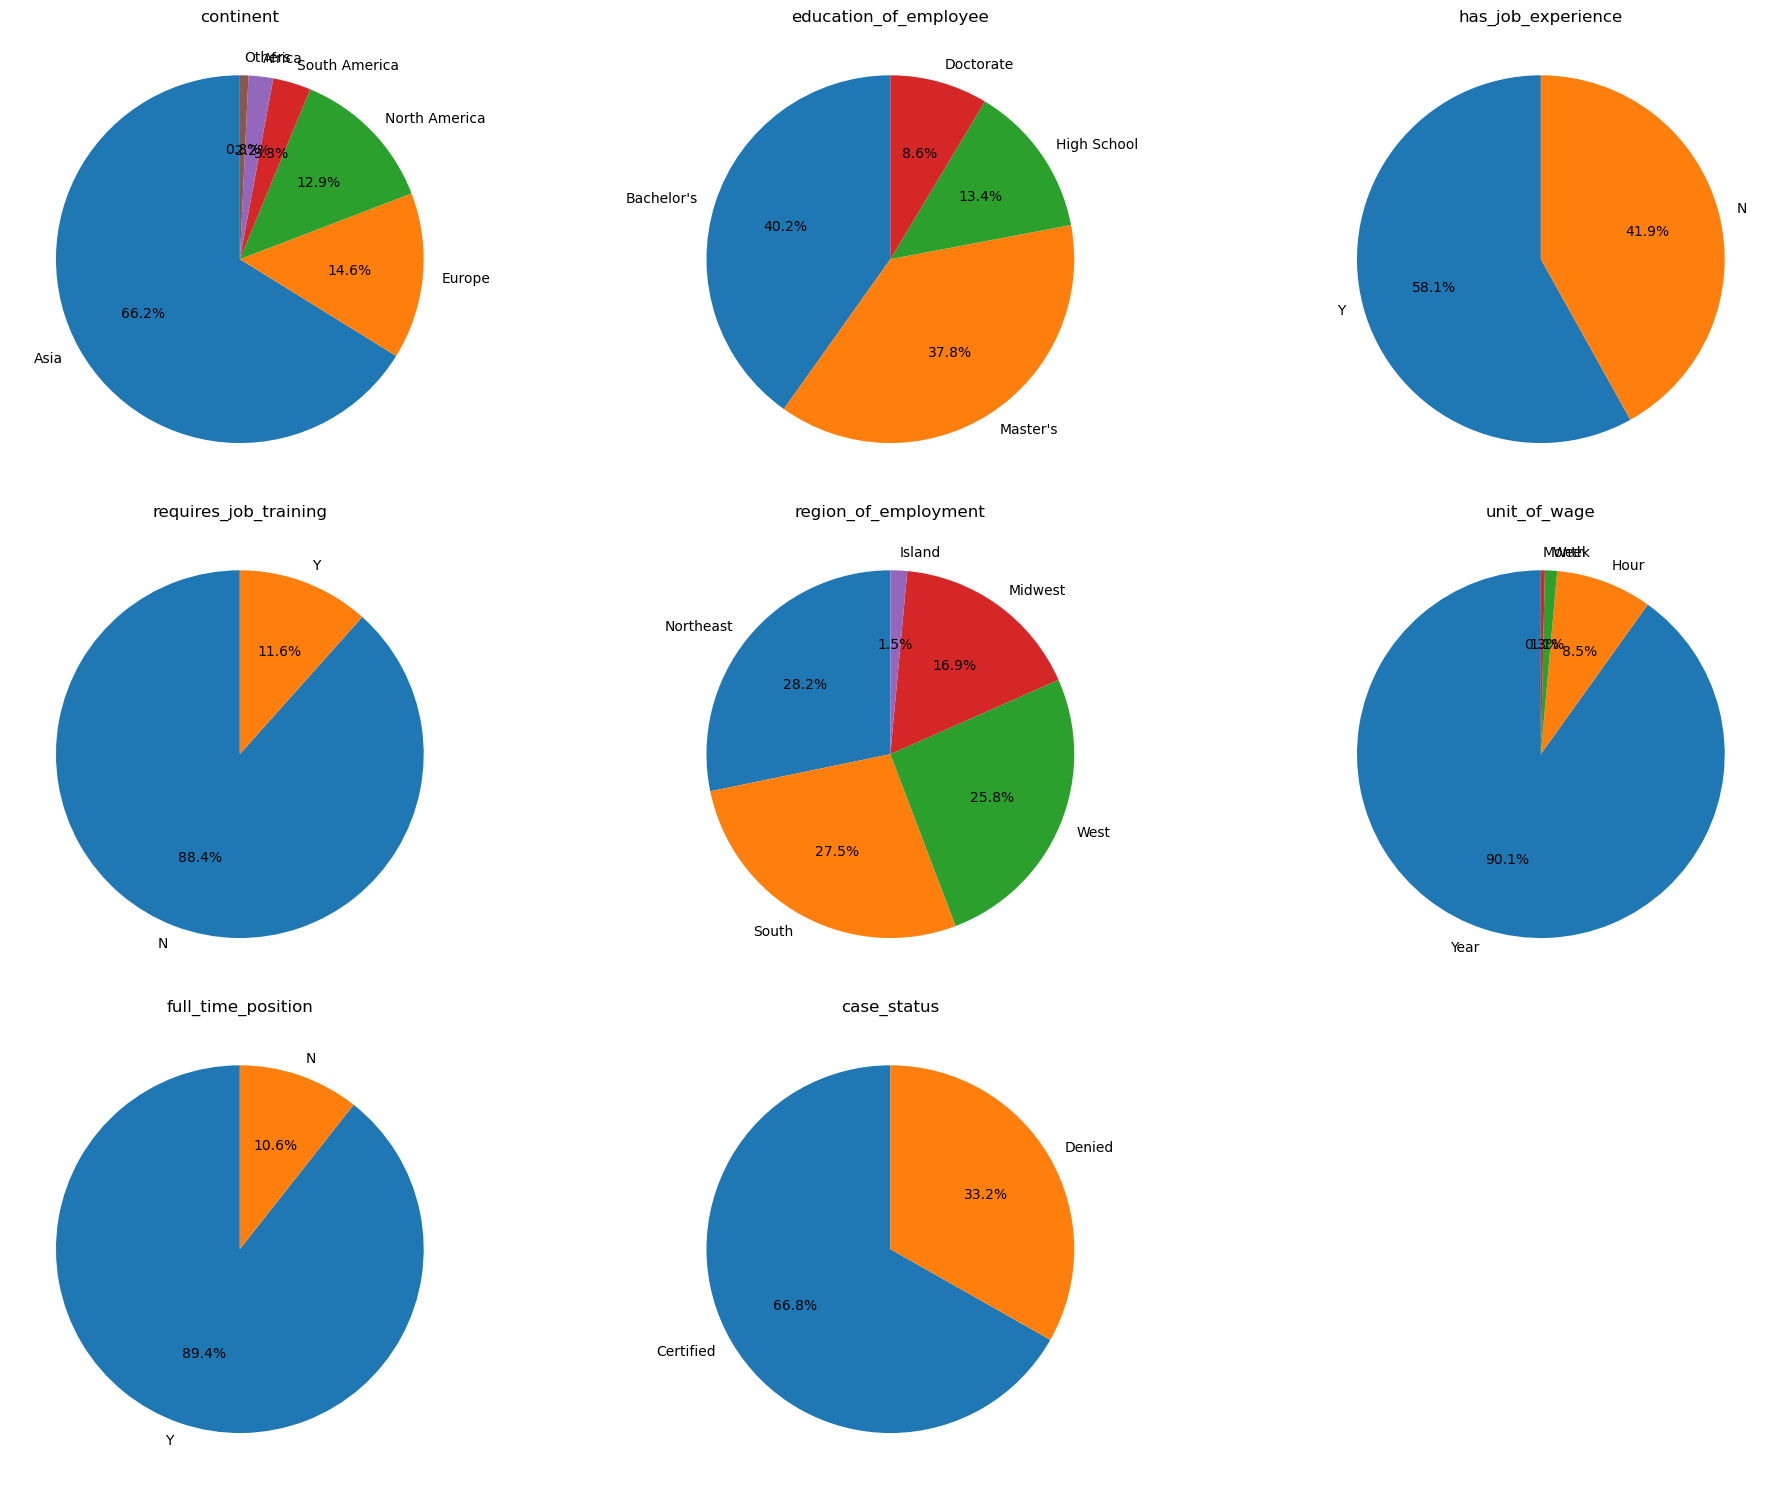

In [22]:
max=5

cat_columns= visa.select_dtypes(include='object').columns.to_list()

num_cols=len(cat_columns)
num_rows=(num_cols + 2)//3
fig,ax=plt.subplots(ncols=3,nrows=num_rows,figsize=(20,5*num_rows))
ax=ax.flatten()

for i,column in enumerate(cat_columns):
    
    if i<len(ax):
        cat_count=visa[column].value_counts()
        
        if len(cat_count)>max:
            cat_count_top=cat_count[:max]
            cat_count_others=pd.Series(cat_count[max:].sum(),index=['Others'])
            cat_count=cat_count_top.append(cat_count_others)
            
            
        ax[i].pie(cat_count,labels=cat_count.index,autopct="%0.1f%%",startangle=90)
        ax[i].set_title(column)
        
        
if num_cols < len(ax):
    for i in range(num_cols,len(ax)):
        fig.delaxes(ax[i])
        
        
fig.tight_layout()

# Missing Values

In [7]:
visa.isnull().sum()
# No Missing values

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [8]:
visa.select_dtypes(include='object').nunique()

continent                6
education_of_employee    4
has_job_experience       2
requires_job_training    2
region_of_employment     5
unit_of_wage             4
full_time_position       2
case_status              2
dtype: int64

# Converting Categorical to Numerical

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in visa.select_dtypes(include='object').columns.to_list():
    visa[i]=le.fit_transform(visa[i])

In [10]:
visa

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,1,2,0,0,14513,2007,4,592.2029,0,1,1
1,1,3,1,0,2412,2002,2,83425.6500,3,1,0
2,1,0,0,1,44444,2008,4,122996.8600,3,1,1
3,1,0,0,0,98,1897,4,83434.0300,3,1,1
4,0,3,1,0,1082,2005,3,149907.3900,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
25475,1,0,1,1,2601,2008,3,77092.5700,3,1,0
25476,1,2,1,0,3274,2006,2,279174.7900,3,1,0
25477,1,3,1,0,1121,1910,3,146298.8500,3,0,0
25478,1,3,1,1,1918,1887,4,86154.7700,3,1,0


In [11]:
visa.corr()['case_status']

continent                0.017606
education_of_employee   -0.100919
has_job_experience      -0.192162
requires_job_training   -0.008423
no_of_employees         -0.008677
yr_of_estab             -0.008597
region_of_employment     0.053490
prevailing_wage         -0.076198
unit_of_wage            -0.207528
full_time_position       0.012711
case_status              1.000000
Name: case_status, dtype: float64

<Axes: >

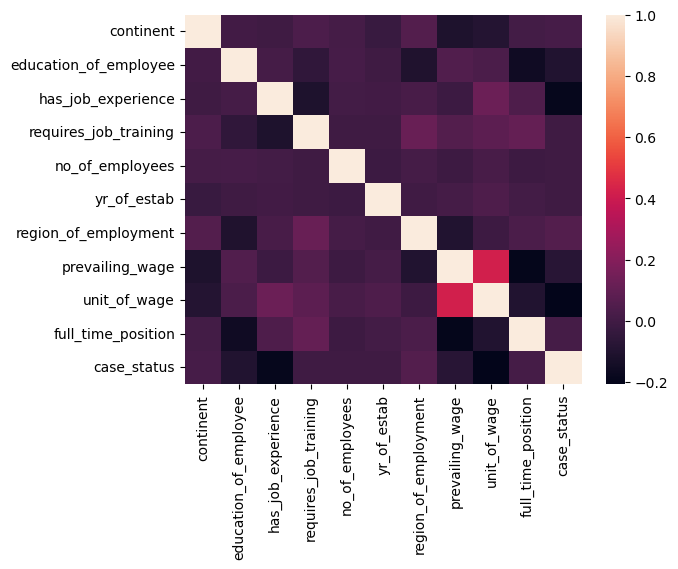

In [9]:
sns.heatmap(visa.corr())

In [12]:
from sklearn.feature_selection import VarianceThreshold
vt=VarianceThreshold(threshold=1)
vt.fit(visa)
vt.get_support()

array([False,  True, False, False,  True,  True,  True,  True, False,
       False, False])

# Different Model Development

# Without Hyper-Parameter tuning

### Train Test Split

In [52]:
X=visa.drop('case_status',axis=1)
y=visa[['case_status']]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.30)

# Removing the Outliers from X_train

In [53]:
from scipy import stats

selected_columns=["prevailing_wage","no_of_employees","yr_of_estab"]

z_scores=np.abs(stats.zscore(X_train[selected_columns]))

threshold=3

outliers_indices = np.where(z_scores > threshold)[0]

X_train = X_train.drop(X_train.index[outliers_indices])
y_train = y_train.drop(y_train.index[outliers_indices])

## Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [55]:
y_pred_dt=dtree.predict(X_test)
y_pred_dt

array([0, 0, 1, ..., 0, 0, 0])

In [56]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,roc_curve
acc_dt=round(accuracy_score(y_test,y_pred_dt),2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
print("accuray is:",acc_dt)
print("F1 is:",f1_dt)
print("Precision is:",precision_dt)
print("Recall is:",recall_dt)

accuray is: 0.65
F1 is: 0.48
Precision is: 0.48
Recall is: 0.48


In [57]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_dt)
cm

array([[3723, 1334],
       [1352, 1235]], dtype=int64)

In [58]:
tn,fp,fn,tp=confusion_matrix(y_test,y_pred_dt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 3723
False postive: 1334
False negative: 1352
True postive: 1235


<Axes: >

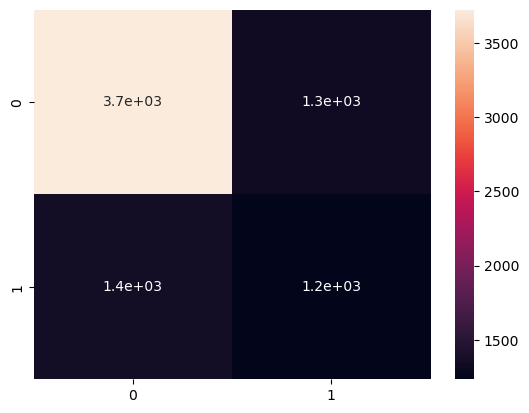

In [59]:
sns.heatmap(cm,annot=True)

### ROC-AUC

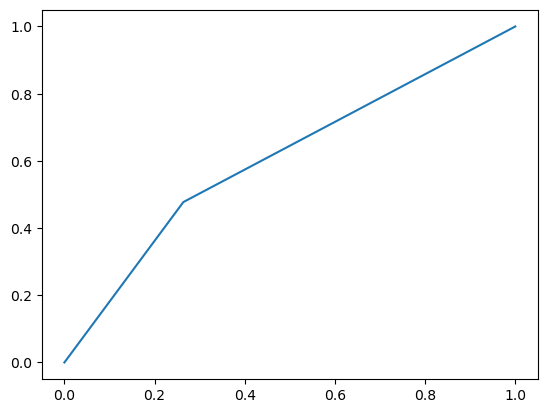

In [60]:
y_pred_dt_prob=dtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_dt_prob)
plt.plot(fpr,tpr)

# Logistic Regression

accuray is: 0.6615646258503401
F1 is: 0.6615646258503401
Precision is: 0.0
Recall is: 0.0


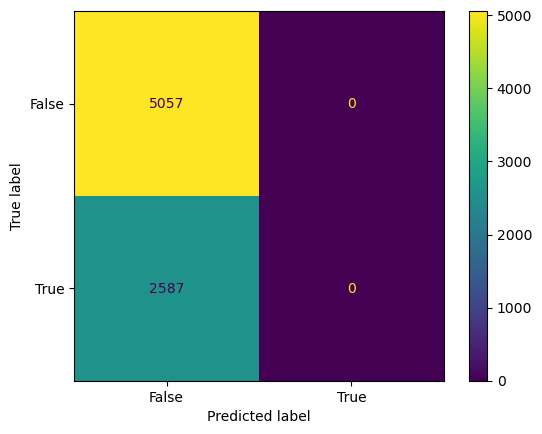

True negative: 5057
False postive: 0
False negative: 2587
True postive: 0


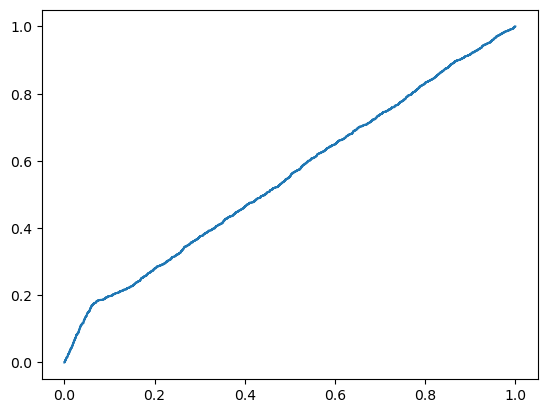

In [61]:
X=visa.drop('case_status',axis=1)
y=visa[['case_status']]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.30)

from scipy import stats
select_columns=["prevailing_wage","no_of_employees","yr_of_estab"]
z_scores = np.abs(stats.zscore(X_train[selected_columns]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])



from sklearn.linear_model import LogisticRegression
logtree=LogisticRegression()
logtree.fit(X_train,y_train)

y_pred_log=logtree.predict(X_test)

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
acc_log=accuracy_score(y_test,y_pred_log)
f1_log=accuracy_score(y_test,y_pred_log)
recall_log=recall_score(y_test,y_pred_log)
precision_log=precision_score(y_test,y_pred_log)
print("accuray is:",acc_log)
print("F1 is:",f1_log)
print("Precision is:",precision_log)
print("Recall is:",recall_log)


from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred_log)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()



tn,fp,fn,tp=confusion_matrix(y_test,y_pred_log).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)


y_log_pred_prob=logtree.predict_proba(X_test)[:,1]   
fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob) 
plt.plot(fpr,tpr)
plt.show()


# Navie Bays

accuracy 0.69
recall 0.14
precision 0.69
f1-score 0.23


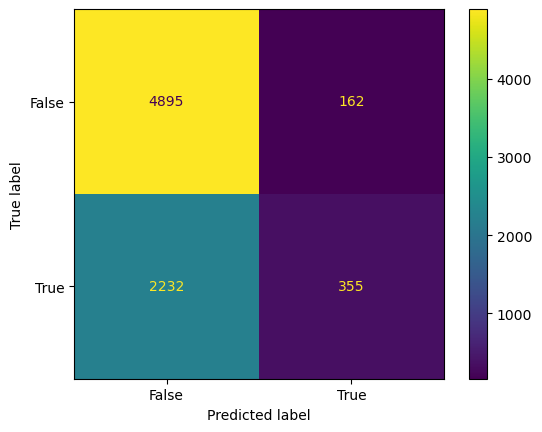

True Negative 4895
False Positive 162
False Negative 2232
True Positive 355


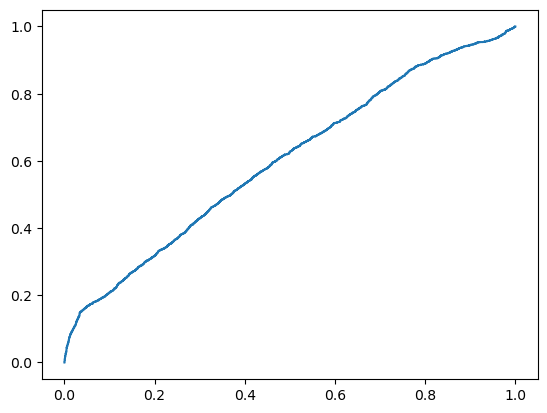

In [62]:
X=visa.drop('case_status',axis=1)
y=visa[['case_status']]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3)

from scipy import stats

select_columns=["prevailing_wage","no_of_employees","yr_of_estab"]
z_score=np.abs(stats.zscore(X_train[select_columns]))
threshold=3
outlier_indices= np.where(z_score > threshold)[0]
X_train= X_train.drop(X_train.index[outlier_indices])
y_train=y_train.drop(y_train.index[outlier_indices])

from sklearn.naive_bayes import GaussianNB
NBtree=GaussianNB()
NBtree.fit(X_train,y_train)

y_pred_NB=NBtree.predict(X_test)

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
acc_NB=round(accuracy_score(y_test,y_pred_NB),2)
recall_NB=round(recall_score(y_test,y_pred_NB),2)
precision_NB=round(precision_score(y_test,y_pred_NB),2)
f1_NB=round(f1_score(y_test,y_pred_NB),2)
print("accuracy",acc_NB)
print("recall",recall_NB)
print("precision",precision_NB)
print("f1-score",f1_NB)


from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred_NB)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()


tn,fp,fn,tp=confusion_matrix(y_test,y_pred_NB).ravel()
print("True Negative",tn)
print("False Positive",fp)
print("False Negative",fn)
print("True Positive",tp)


y_pred_NB_log=NBtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_NB_log)
plt.plot(fpr,tpr)
plt.show()


# KNN

accuracy 0.62
recall 0.26
precision 0.41
f1-score 0.32


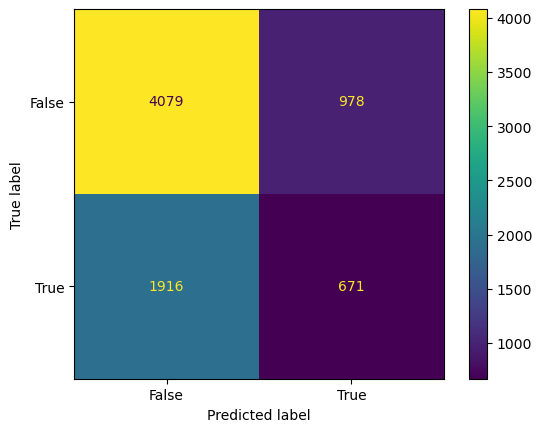

True Negative 4079
False Positive 978
False Negative 1916
True Positive 671


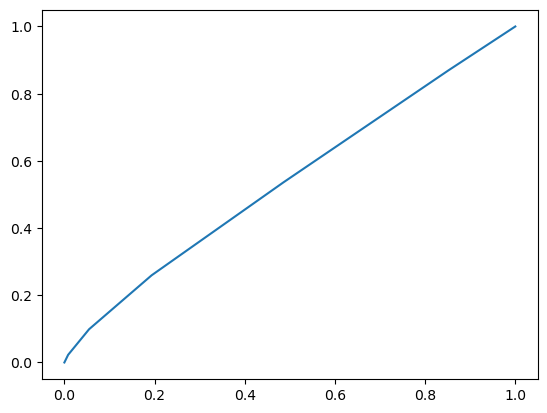

In [63]:
X=visa.drop('case_status',axis=1)
y=visa[['case_status']]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3)

from scipy import stats
select_columns=["prevailing_wage","no_of_employees","yr_of_estab"]
z_score=np.abs(stats.zscore(X_train[select_columns]))
threshold=3
outlier_indices= np.where(z_score > threshold)[0]
X_train= X_train.drop(X_train.index[outlier_indices])
y_train=y_train.drop(y_train.index[outlier_indices])

from sklearn.neighbors import KNeighborsClassifier
KNNtree=KNeighborsClassifier()
KNNtree.fit(X_train,y_train)

y_pred_KNN=KNNtree.predict(X_test)

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
acc_KNN=round(accuracy_score(y_test,y_pred_KNN),2)
recall_KNN=round(recall_score(y_test,y_pred_KNN),2)
precision_KNN=round(precision_score(y_test,y_pred_KNN),2)
f1_KNN=round(f1_score(y_test,y_pred_KNN),2)
print("accuracy",acc_KNN)
print("recall",recall_KNN)
print("precision",precision_KNN)
print("f1-score",f1_KNN)


from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred_KNN)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()


tn,fp,fn,tp=confusion_matrix(y_test,y_pred_KNN).ravel()
print("True Negative",tn)
print("False Positive",fp)
print("False Negative",fn)
print("True Positive",tp)


y_pred_KNN_log=KNNtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_KNN_log)
plt.plot(fpr,tpr)
plt.show()


# Random Forest

accuracy 0.72
recall 0.47
precision 0.61
f1-score 0.53


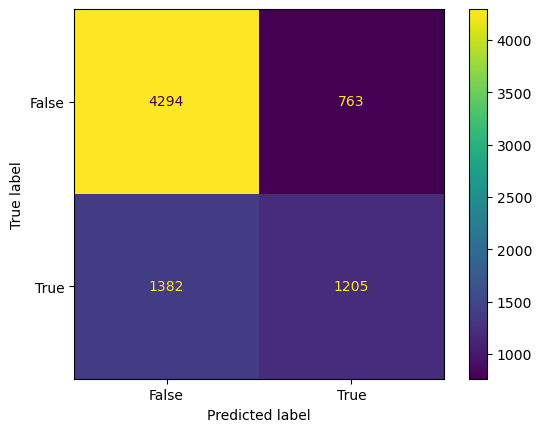

True Negative 4294
False Positive 763
False Negative 1382
True Positive 1205


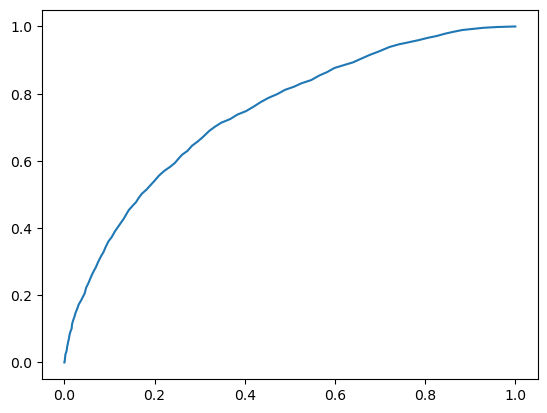

In [64]:
X=visa.drop('case_status',axis=1)
y=visa[['case_status']]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3)

from scipy import stats
select_columns=["prevailing_wage","no_of_employees","yr_of_estab"]
z_score=np.abs(stats.zscore(X_train[select_columns]))
threshold=3
outlier_indices= np.where(z_score > threshold)[0]
X_train= X_train.drop(X_train.index[outlier_indices])
y_train=y_train.drop(y_train.index[outlier_indices])

from sklearn.ensemble import RandomForestClassifier
RFtree=RandomForestClassifier()
RFtree.fit(X_train,y_train)

y_pred_RF=RFtree.predict(X_test)

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_curve
acc_RF=round(accuracy_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF),2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
print("accuracy",acc_RF)
print("recall",recall_RF)
print("precision",precision_RF)
print("f1-score",f1_RF)


from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred_RF)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()


tn,fp,fn,tp=confusion_matrix(y_test,y_pred_RF).ravel()
print("True Negative",tn)
print("False Positive",fp)
print("False Negative",fn)
print("True Positive",tp)


y_pred_RF_log=RFtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_RF_log)
plt.plot(fpr,tpr)
plt.show()


In [65]:
dict1={'Accuracy':[acc_dt,acc_log,acc_NB,acc_KNN,acc_RF],
        'Precssion':[precision_dt,precision_log,precision_NB,precision_KNN,precision_RF],
          'Recall':[recall_dt,recall_log,recall_NB,recall_KNN,recall_RF],
              'F1-score':[f1_dt,f1_log,f1_NB,f1_KNN,f1_RF]}

In [67]:
without_hyperparameter_tuning_df=pd.DataFrame(dict1,index=['DT','KNN','Logistic','Naive Bayes','Random Forest'])
without_hyperparameter_tuning_df

,Accuracy,Precssion,Recall,F1-score
DT,0.650000,0.48,0.48,0.480000
KNN,0.661565,0.00,0.00,0.661565
Logistic,0.690000,0.69,0.14,0.230000
Naive Bayes,0.620000,0.41,0.26,0.320000
Random Forest,0.720000,0.61,0.47,0.530000


# With Hyper-Parameter Tuning

## 1) Decision Tree

In [26]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_tree=DecisionTreeClassifier()
grid_tree

DecisionTreeClassifier()

In [27]:
grid_tree.get_params()
# gives the parameters which can be tuned.

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [28]:
DT_params=[i for i in grid_tree.get_params()]
DT_params

['ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'random_state',
 'splitter']

In [29]:
param_grid={
    'criterion':['gini','entropy'],
    'max_depth':[3,4,5,6,7,8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

In [30]:
grid_search=GridSearchCV(grid_tree,param_grid,cv=5,scoring='accuracy',verbose=True)
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [32]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [33]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'random_state': 0}

In [34]:
grid_search.best_score_

0.7384706579727327

In [35]:
cross_val_score(grid_search.best_estimator_,X_train,y_train,scoring='accuracy')

array([0.74451689, 0.73977475, 0.73770006, 0.72673385, 0.74362774])

In [36]:
cross_val_score(grid_search.best_estimator_,X_train,y_train,scoring='accuracy').mean()

0.7384706579727327

### Developing Decision Tree with best Parameters

accuray is: 72.88
F1 is: 0.51
Precision is: 0.66
Recall is: 0.41


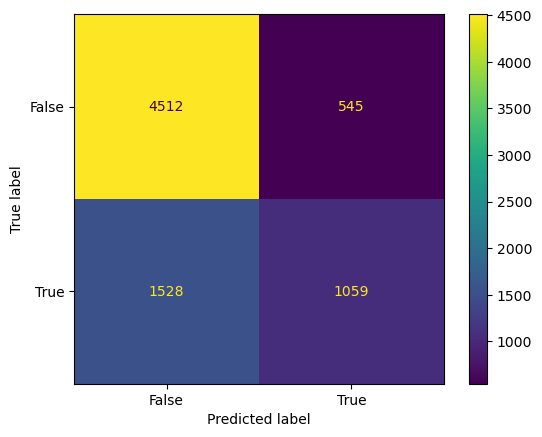

True negative: 4512
False postive: 545
False negative: 1528
True postive: 1059


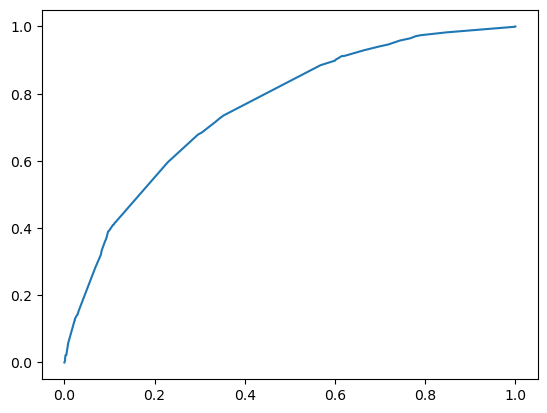

In [37]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',
 max_depth= 6,
 min_samples_leaf=4,
 min_samples_split=2,
 random_state= 0)

dtree.fit(X_train,y_train)


y_pred_dt=dtree.predict(X_test)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc_dt=round(accuracy_score(y_test,y_pred_dt)*100,2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)

print("accuray is:",acc_dt)
print("F1 is:",f1_dt)
print("Precision is:",precision_dt)
print("Recall is:",recall_dt)

cmt=confusion_matrix(y_test,y_pred_dt)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()


tn,fp,fn,tp=confusion_matrix(y_test,y_pred_dt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)


y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob)
plt.plot(fpr,tpr)

## 2) Random Forest

In [18]:
import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import GridSearchCV
grid_RF=RandomForestClassifier()
grid_RF

RF_params=[keys for keys in grid_RF.get_params()]
print("The avaialable parameters are : ",RF_params)
print("==============================================================================================")
param_grid={
    'criterion' : ['gini','entropy'],
    'max_depth' : [3,4,5,6,7,8,9],
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
    
}


print("Processing Parameters are : ",param_grid)
print("================================================================================================")
grid_search=GridSearchCV(grid_RF,param_grid,cv=5,scoring='accuracy',verbose=True)
grid_search.fit(X_train,y_train)

best_param=grid_search.best_params_
best_score=grid_search.best_score_
print("Best Parameters are : ",best_param)
print("Best Score is : ",best_score)


The avaialable parameters are :  ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start']
Processing Parameters are :  {'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, 5, 6, 7, 8, 9], 'n_estimators': [100, 200], 'max_features': ['sqrt', 'log2', None], 'random_state': [0, 42]}
Fitting 5 folds for each of 168 candidates, totalling 840 fits
Best Parameters are :  {'criterion': 'entropy', 'max_depth': 9, 'max_features': None, 'n_estimators': 100, 'random_state': 0}
Best Score is :  0.7435684647302905


# Developing Random Forest with Best Parameters

C:\Users\Work Only\AppData\Local\Temp\ipykernel_19952\3611424627.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


Accuracy is :  0.7412349555206698
F1 score is :  0.5488138686131387
Recall score is :  0.46501739466563585
Precision is :  0.669449081803005


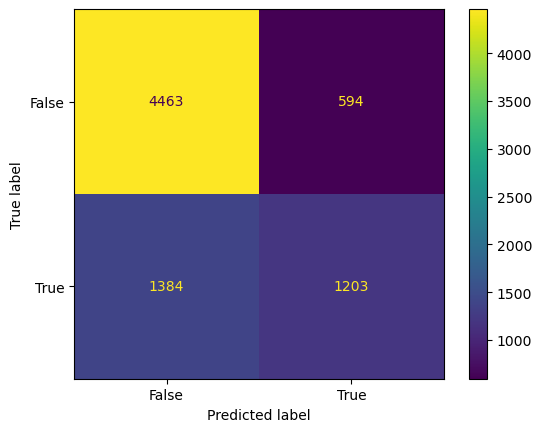

True Negative :  4463
False Positive :  594
False Negative :  1384
True Positive :  1203


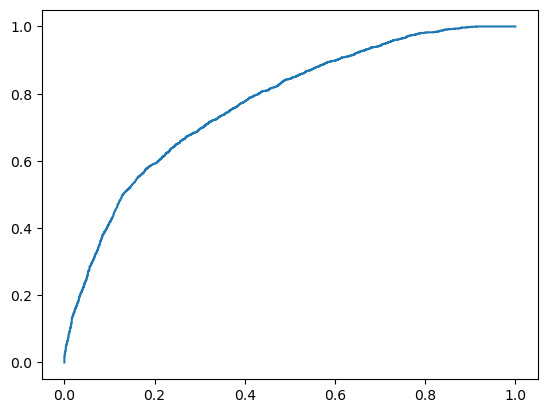

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion= 'entropy', max_depth= 9, max_features= None, n_estimators= 100, random_state= 0)
rf.fit(X_train,y_train)

y_pred_rf=rf.predict(X_test)

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
rf_acc=accuracy_score(y_test,y_pred_rf)
rf_f1=f1_score(y_test,y_pred_rf)
rf_recall=recall_score(y_test,y_pred_rf)
rf_precision=precision_score(y_test,y_pred_rf)

print("Accuracy is : ",rf_acc)
print("F1 score is : ",rf_f1)
print("Recall score is : ",rf_recall)
print("Precision is : ",rf_precision)

cmd=confusion_matrix(y_test,y_pred_rf)
disp=ConfusionMatrixDisplay(confusion_matrix=cmd,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()


tn,fp,fn,tp=confusion_matrix(y_test,y_pred_rf).ravel()
print("True Negative : ",tn)
print("False Positive : ",fp)
print("False Negative : ",fn)
print("True Positive : ",tp)


y_pred_rf_prob=rf.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_rf_prob)
plt.plot(fpr,tpr)
plt.show()

## 3) KNN

In [1]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
grid_KNN=KNeighborsClassifier()
grid_KNN
KNN_param=[i for i in grid_KNN.get_params()]
print("Available Parameters are : ",KNN_param)

print("==============================================")

param_grid={
    'algorithm':['auto', 'ball_tree', 'kd_te'],
    "n_neighbors":[5,6,7,10],
    "leaf_size":[20,30,40,50]
}

grid_search=GridSearchCV(grid_KNN,param_grid,cv=5,verbose=True,scoring='accuracy')
grid_search.fit(X_train,y_train)

print("The Best Parameters are : ",grid_search.best_params_)
print("The best score is : ",grid_search.best_score_)

NameError: name 'KNeighborsClassifier' is not defined

### Developing KNN with Best Parameters

Accuracy is :  0.6603872318158033
F1 score is :  0.24270711785297552
Recall score is :  0.16080402010050251
Precision is :  0.4946492271105826


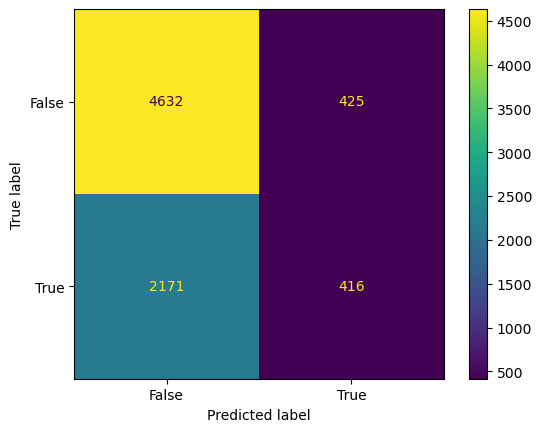

True Negative :  4632
False Positive :  425
False Negative :  2171
True Positive :  416


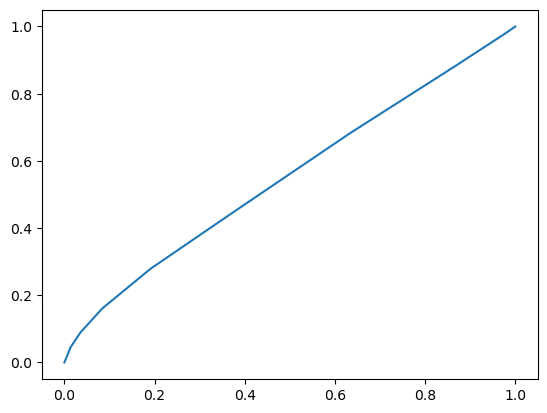

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(algorithm= 'auto', leaf_size=20, n_neighbors= 10)
knn.fit(X_train,y_train)

y_pred_knn=knn.predict(X_test)

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
knn_acc=accuracy_score(y_test,y_pred_knn)
knn_f1=f1_score(y_test,y_pred_knn)
knn_recall=recall_score(y_test,y_pred_knn)
knn_precision=precision_score(y_test,y_pred_knn)

print("Accuracy is : ",knn_acc)
print("F1 score is : ",knn_f1)
print("Recall score is : ",knn_recall)
print("Precision is : ",knn_precision)

cmd=confusion_matrix(y_test,y_pred_knn)
disp=ConfusionMatrixDisplay(confusion_matrix=cmd,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()


tn,fp,fn,tp=confusion_matrix(y_test,y_pred_knn).ravel()
print("True Negative : ",tn)
print("False Positive : ",fp)
print("False Negative : ",fn)
print("True Positive : ",tp)


y_pred_knn_prob=knn.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_knn_prob)
plt.plot(fpr,tpr)
plt.show()

## 4) Navie Baye's

In [41]:
from sklearn.model_selection import GridSearchCV
grid_nb=GaussianNB()
print("Available Parameters are : ",grid_nb.get_params())

print("===================================================================")

param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search=GridSearchCV(grid_nb,param_grid,cv=5,verbose=True,scoring='accuracy')
grid_search.fit(X_train,y_train)

print("The best parameters are  : ",grid_search.best_params_)
print("The Best score is : ",grid_search.best_score_)

Available Parameters are :  {'priors': None, 'var_smoothing': 1e-09}
Fitting 5 folds for each of 100 candidates, totalling 500 fits
The best parameters are  :  {'var_smoothing': 1e-09}
The Best score is :  0.6942501481920569


### Devloping the Navie Bayes Model with best parameters

Accuracy score is :  0.6868131868131868
F-1 score is :  0.22873711340206182
Recall score is :  0.13722458446076535
Precision score is :  0.6866537717601547


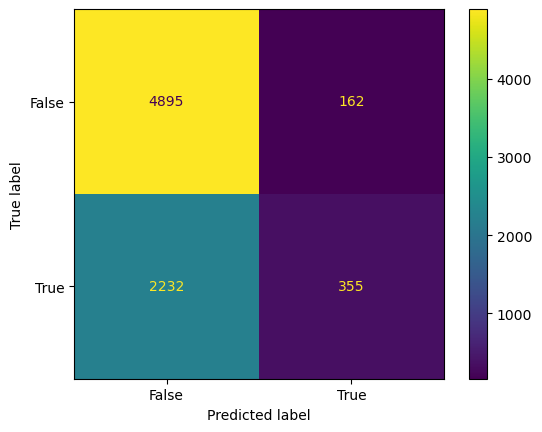

True Negative :  4895
False Positive :  162
False Negative :  2232
True Positive :  355


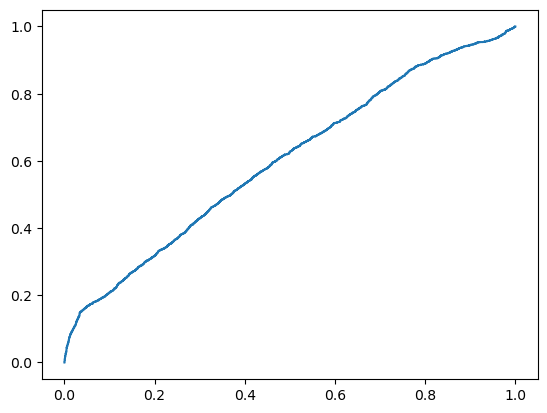

In [42]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB(var_smoothing=1e-09)

nb.fit(X_train,y_train)

y_pred_nb=nb.predict(X_test)

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
nb_acc=accuracy_score(y_test,y_pred_nb)
nb_f1=f1_score(y_test,y_pred_nb)
nb_recall=recall_score(y_test,y_pred_nb)
nb_precision=precision_score(y_test,y_pred_nb)

print("Accuracy score is : ",nb_acc)
print("F-1 score is : ",nb_f1)
print("Recall score is : ",nb_recall)
print("Precision score is : ",nb_precision)

cmd=confusion_matrix(y_test,y_pred_nb)
disp=ConfusionMatrixDisplay(confusion_matrix=cmd,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()


tn,fp,fn,tp=confusion_matrix(y_test,y_pred_nb).ravel()
print("True Negative : ",tn)
print("False Positive : ",fp)
print("False Negative : ",fn)
print("True Positive : ",tp)


y_pred_nb_prob=nb.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_nb_prob)
plt.plot(fpr,tpr)
plt.show()


## 5) Logistic Regression

In [43]:
from sklearn.model_selection import GridSearchCV
grid_lr=LogisticRegression()

print("Available Parameters are : ",grid_lr.get_params())
print("=========================================================")

param_grid={
    'penalty': ['l1', 'l2'],  
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']
}

grid_search=GridSearchCV(grid_lr,param_grid,cv=5,scoring='accuracy',verbose=True)
grid_search.fit(X_train,y_train)

print("The best parameters are : ",grid_search.best_params_)
print("The Best score is : ",grid_search.best_score_)

Available Parameters are :  {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Fitting 5 folds for each of 60 candidates, totalling 300 fits
The best parameters are :  {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
The Best score is :  0.698221695317131


### Developing Logistic Regression Model with Best Parameters

Accuracy score is :  0.6615646258503401
F-1 score is :  0.0
Recall score is :  0.0
Precision score is :  0.0


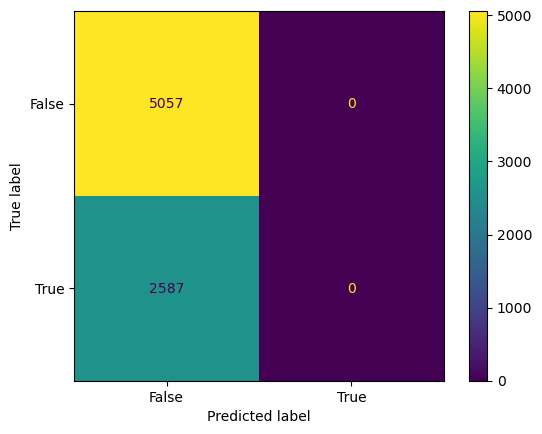

True Negative :  5057
False Positive :  0
False Negative :  2587
True Positive :  0


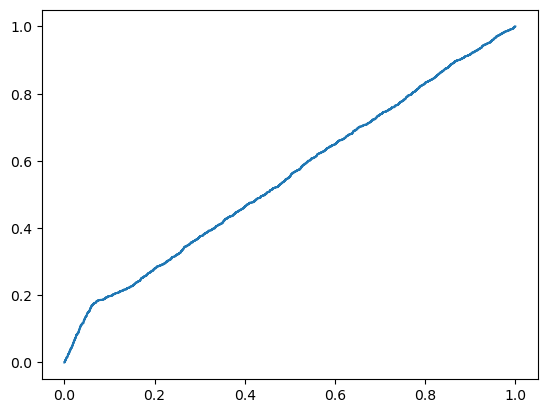

In [44]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

y_pred_lr=lr.predict(X_test)

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
lr_acc=accuracy_score(y_test,y_pred_lr)
lr_f1=f1_score(y_test,y_pred_lr)
lr_recall=recall_score(y_test,y_pred_lr)
lr_precision=precision_score(y_test,y_pred_lr)

print("Accuracy score is : ",lr_acc)
print("F-1 score is : ",lr_f1)
print("Recall score is : ",lr_recall)
print("Precision score is : ",lr_precision)

cmd=confusion_matrix(y_test,y_pred_lr)
disp=ConfusionMatrixDisplay(confusion_matrix=cmd,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()


tn,fp,fn,tp=confusion_matrix(y_test,y_pred_lr).ravel()
print("True Negative : ",tn)
print("False Positive : ",fp)
print("False Negative : ",fn)
print("True Positive : ",tp)


y_pred_lr_prob=lr.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_lr_prob)
plt.plot(fpr,tpr)
plt.show()


In [46]:
dict2={'Accuracy':[acc_dt,knn_acc,lr_acc,nb_acc,rf_acc],
        'Precssion':[precision_dt,knn_precision,lr_precision,nb_precision,rf_precision],
          'Recall':[recall_dt,knn_recall,lr_recall,nb_recall,rf_recall],
              'F1-score':[f1_dt,knn_f1,lr_f1,nb_f1,rf_f1]}

In [68]:
with_hyperparameter_tuning_df=pd.DataFrame(dict2,index=['DT','KNN','Logistic','Naive Bayes','Random Forest'])
with_hyperparameter_tuning_df

,Accuracy,Precssion,Recall,F1-score
DT,72.880000,0.660000,0.410000,0.510000
KNN,0.660387,0.494649,0.160804,0.242707
Logistic,0.661565,0.000000,0.000000,0.000000
Naive Bayes,0.686813,0.686654,0.137225,0.228737
Random Forest,0.741235,0.669449,0.465017,0.548814


In [69]:
without_hyperparameter_tuning_df

,Accuracy,Precssion,Recall,F1-score
DT,0.650000,0.48,0.48,0.480000
KNN,0.661565,0.00,0.00,0.661565
Logistic,0.690000,0.69,0.14,0.230000
Naive Bayes,0.620000,0.41,0.26,0.320000
Random Forest,0.720000,0.61,0.47,0.530000
